<h1 style='text-align: center;'>Hotel Booking Demand</h1>
<h5 style='text-align: center;'>Created by: Umam Ihsanil Ummah & Garudapaksi Yusuf</h5>

# **Contents**

- Business Problem Understanding
- Data Understanding
- Exploratory Data Analysis
- Data Preparation
- Modeling
- Conclusion and Recommendation
- Save Model

---
# **Business Problem Understanding**

### Context

In the competitive landscape of the hospitality industry, understanding the intricate dynamics of hotel booking cancellations is paramount for optimizing revenue management and enhancing customer satisfaction. The ability to accurately predict and mitigate cancellations can significantly impact a hotel's financial performance and operational efficiency.

### Problem Statement

In the hospitality industry, booking cancellations pose significant challenges to revenue management, operational efficiency, and customer satisfaction. Despite the implementation of various customer engagement strategies and flexible booking policies, the unpredictability and frequency of cancellations continue to disrupt forecasting accuracy, inventory control, and financial stability. Additionally, hotels experience considerable financial losses due to cancellations, which manifest as lost revenue from unoccupied rooms, increased operational costs, and diminished profitability. [The global cancellation rate of hotel reservations reaches 40% on average](https://hospitalitytech.com/global-cancellation-rate-hotel-reservations-reaches-40-average).

### Objective

This analysis delves into the multifaceted factors influencing cancellation rates, leveraging advanced statistical techniques and to develop a machine learning classification model to predict hotel booking cancellations patterns and actionable insights. 
By leveraging historical booking data and various features associated with each booking record, I aim to analyze and develop a predictive model that can classify bookings into "Canceled" (1) or "Not Canceled" (0) categories. This model will help hotel managers allocate resources more effectively and optimize inventory management to reduce potential revenue loss due to cancellations.

### Analytical Approach

* **Step-1**: Perform an exploratory data analysis (EDA) to understand the characteristics of data before building a classification model.
* **Step-2**: Build a classification model to predict the probability of customers canceling their hotel booking.
* **Step-3**: Identify key factors underlie the cancelation of hotel bookings.

### Metric Evaluation

<img src='docs/Matrix.png'>

- **Type II Error (False Negative)**: When the model fails to predict a cancellation, the hotel is still required to bear the operational cost of a room upkeep. 
    * This cost amounts to [US$175 per night](https://www.fairjungle.com/e-book/b2b-hotel-price-index-worldwide-2022).

- **Type I Error (False Positive)**: When the model incorrectly identifies a booking as canceled, it may lead to overbooking situation (i.e. more reservations than available rooms at a particular time), which demands unnecessary actions by the hotel such as providing compensation to guests by offering similar or better room types.
    - This cost ranges from [US$75 - 200 per night](https://www.viqal.com/blog/hotel-room-prices-around-the-world) (see below).
    - Additionally, Hotel operational costs are also applied to this situation, which further increases the amounts to US$225 - 375 per night


In [128]:
# ...
NA_major_budget, NA_major_mid, NA_major_luxury = (100 + 150) / 2, (200 + 300) / 2, 400
NA_minor_budget, NA_minor_mid, NA_minor_luxury = (50 + 80) / 2, (100 + 150) / 2, (200 + 350) / 2
NA_rural_budget, NA_rural_mid, NA_rural_luxury = (40 + 70) / 2, (80 + 130) / 2, (150 + 300) / 2

europe_major_budget, europe_major_mid, europe_major_luxury = (100 + 150) / 2, (200 + 300) / 2, 400
europe_minor_budget, europe_minor_mid, europe_minor_luxury = (60 + 90) / 2, (100 + 180) / 2, (200 + 350) / 2
europe_rural_budget, europe_rural_mid, europe_rural_luxury = (50 + 80) / 2, (90 + 150) / 2, (180 + 300) / 2

asia_major_budget, asia_major_mid, asia_major_luxury = (50 + 100) / 2, (120 + 250) / 2, 300
asia_minor_budget, asia_minor_mid, asia_minor_luxury = (20 + 40) / 2, (50 + 100) / 2, (120 + 250) / 2
asia_rural_budget, asia_rural_mid, asia_rural_luxury = (15 + 30) / 2, (40 + 80) / 2, (100 + 200) / 2

global_major_budget = (NA_major_budget + europe_major_budget + asia_major_budget) / 3
global_minor_budget = (NA_minor_budget + europe_minor_budget + asia_minor_budget) / 3
global_rural_budget = (NA_rural_budget + europe_rural_budget + asia_rural_budget) / 3
global_major_mid = (NA_major_mid + europe_major_mid + asia_major_mid) / 3
global_minor_mid = (NA_minor_mid + europe_minor_mid + asia_minor_mid) / 3
global_rural_mid = (NA_rural_mid + europe_rural_mid + asia_rural_mid) / 3
global_major_luxury = (NA_major_luxury + europe_major_luxury + asia_major_luxury) / 3
global_minor_luxury = (NA_minor_luxury + europe_minor_luxury + asia_minor_luxury) / 3
global_rural_luxury = (NA_rural_luxury + europe_rural_luxury + asia_rural_luxury) / 3

global_budget = (global_major_budget + global_minor_budget + global_rural_budget) / 3
global_mid = (global_major_mid + global_minor_mid + global_rural_mid) / 3
global_luxury = (global_major_luxury + global_minor_luxury + global_rural_luxury) / 3

compensation_budget_mid = global_mid - global_budget
compensation_mid_luxury = global_luxury - global_mid
compensation_budget_luxury = global_luxury - global_budget

print(f'''Compensation to upgrade from budget room to mid-range room: US${round(number=compensation_budget_mid)}
Compensation to upgrade from mid-range room to luxury room: US${round(number=compensation_mid_luxury)}
Compensation to upgrade from budget room to luxury room: US${round(number=compensation_budget_luxury)}''')


Compensation to upgrade from budget room to mid-range room: US$75
Compensation to upgrade from mid-range room to luxury room: US$127
Compensation to upgrade from budget room to luxury room: US$201


Hence, the focus of this analysis lies in mitigating the impact of false positives (Type I errors), as they pose a higher financial risk to the hotel. However, a consideration is also given to minimize false negatives (Type II errors) to maintain operational efficiency.

The main evaluation metric for model performance will be:
1. **Precision** score, which is useful in cases where False Positive is a higher concern than False Negative, and
2. **F-beta** (F2) score —with beta = 0.5— may also be used, since this beta ratio makes Precision score twice as important as Recall.

---
# **Data Understanding**

In [129]:
# Importing libraries for data analysis
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest, normaltest

In [130]:
# Loading dataset
data = pd.read_csv(filepath_or_buffer='hotel_bookings.csv')

# Showing dataset sample
display(data.sample(n=5))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
112531,City Hotel,0,17,2017,May,21,21,2,2,2,...,No Deposit,9.0,NaN,0,Transient,137.5,0,1,Check-Out,2017-05-25
5023,Resort Hotel,1,168,2016,April,16,12,0,2,2,...,Non Refund,245.0,NaN,0,Transient,86.0,0,0,Canceled,2016-01-05
83482,City Hotel,0,10,2016,February,6,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,92.0,0,0,Check-Out,2016-02-04
101613,City Hotel,0,51,2016,November,46,11,2,2,2,...,No Deposit,28.0,NaN,0,Transient,75.0,0,0,Check-Out,2016-11-15
53867,City Hotel,1,142,2016,July,27,1,0,2,2,...,No Deposit,9.0,NaN,0,Transient-Party,85.5,0,0,Canceled,2016-06-06


### **About Dataset**

The [data](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data) is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

The dataset containing historical hotel booking records, including information such as booking dates, customer demographics, booking channels, room types, and reservation details will be utilized to build a predictive model. The dataset will be preprocessed to handle missing values, outliers, and categorical variables before training the classification model.

### **Features**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| hotel | string | Resort Hotel or City Hotel |
| lead_time | string | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year | int | Year of arrival date |
| arrival_date_month | string | Month of arrival date |
| arrival_date_week_number | int | Week number of year for arrival date |
| arrival_date_day_of_month | int | Day of arrival date |
| stays_in_weekend_nights | int | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights | string | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults | int | Number of adults |
| children | int | Number of children |
| babies | int | Number of babies |
| meal | string | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner) |
| country | string | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
| market_segment | string | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| distribution_channel | string | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| is_repeated_guest | int | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| previous_cancellations | int | Number of previous bookings that were cancelled by the customer prior to the current booking |
| previous_bookings_not_canceled | int | Number of previous bookings not cancelled by the customer prior to the current booking |
| reserved_room_type | string | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| assigned_room_type | string | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. |
| booking_changes | string | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type | string | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. |
| agent | int | ID of the travel agency that made the booking |
| company | int | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
| days_in_waiting_list | int | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | string | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
| adr | string | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces | string | Number of car parking spaces required by the customer |
| total_of_special_requests | string | Number of special requests made by the customer (e.g. twin bed or high floor) |
| reservation_status | string | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
| reservation_status_date | string | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

### **Target**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| is_canceled | int | Value indicating if the booking was canceled (1) or not (0) |

### **Data Size: Amount & Range**

In [131]:
# Define function for inspecting dataframe
def inspect_dataframe(df):
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NApercent': (df.isna().mean() * 100).round(5).tolist(),
        'Nduplicate': df.duplicated().sum(),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [132]:
# Show more in 'Sample' column
with pd.option_context('display.max_colwidth', 225):

    # Inspect data
    display(inspect_dataframe(data))

,ColumnName,Nrow,DataType,NApercent,Nduplicate,UniqueValue,Sample
0,hotel,119390,object,0.00000,31994,2,"[Resort Hotel, City Hotel]"
1,is_canceled,119390,int64,0.00000,31994,2,"[0, 1]"
2,lead_time,119390,int64,0.00000,31994,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 32..."
3,arrival_date_year,119390,int64,0.00000,31994,3,"[2015, 2016, 2017]"
4,arrival_date_month,119390,object,0.00000,31994,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,119390,int64,0.00000,31994,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,119390,int64,0.00000,31994,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,119390,int64,0.00000,31994,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,119390,int64,0.00000,31994,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,119390,int64,0.00000,31994,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


Notes:
* The dataset contains 119.390 rows and 32 columns including `is_canceled` as the target variable.
* The numerical variables (int64/float64) are `lead_time`, `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `agent`, `company`, `days_in_waiting_list`, `adr`, `required_car_parking_spaces`, and `total_of_special_requests`. While the categorical variables (object) are `hotel`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`, `reservation_status`, and `reservation_status_date`.
* Other than these, the dataset also has `is_cancelled` which will be used as the target variable. It consists of binary numbers, i.e., 0 for not canceled and 1 for canceled.
* The missing value rate are 0.41% detected in column country, 13.69% detected in column agent, and 94.31% detected in column company. And also in the `children` column there is nan value. This issue will be further checked in the following section.

In [133]:
# Generating initial descriptive statistics for dataset
display(data.describe(include=['object']).T, data.describe().T)

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Data Insights

* **Numerical Variables**
    - `is_canceled`: The range of values in the target variable is between 0 (Not Canceled) and 1 (Canceled). About 37% bookings of the total bookings are canceled.
    - `lead_time`: Most bookings are made less than 180 days or 6 months before arrival, the rest make bookings more than that (even for the next 2 years).
    - `arrival_date_year`: The bookings are made in 2015, 2016, and 2017. With the most bookings in 2016.
    -  `arrival_date_week_number`: If there are 53 weeks in a year, then bookings are done throughout the year with the most bookings in the 28th week or mid-year.
    - `arrival_date_day_of_month`: In one month, there is always an order every day with the most bookings in the 16th day or mid-month.
    - `stays_in_weekend_nights`: Most guests stay only 2 nights on weekends.
    - `stays_in_week_nights`: Most guests stay only 3 nights on weekdays.
    - `adults`: Most bookings are only for 2 adults, although some are for 55 adults.
    - `children`: The majority of bookings don't include children in the bookings, although there are some bookings that include up to 10 children.
    - `babies`: The majority of bookings don't include babies in the bookings, although there are some bookings that include up to 10 babies.
    - `is_repeated_guest`: A small percentage of bookings are made by people who have booked before.
    - `previous_cancellations`: A single customer have canceled up to 26 times.
    - `previous_bookings_not_canceled`: This indicates that most bookings are made by a new customer, so they have never canceled before.
    - `booking_changes`: Most bookings never change or are in accordance with the initial bookings.
    - `agent`: It indicates Agent ID that made the bookings with considerable variability.
    - `company`: It indicates the company/entity ID that made the bookings or responsible for paying the bookings with considerable variability.
    - `days_in_waiting_list`: While most bookings spend no time on the waiting list, some have waited for as many as 391 days with considerable variability.
    -  `adr`: Most bookings daily rate ranged between USD -6.38 to USD 5,400. I assume that the negative rate is due to a typo.
    - `required_car_parking_spaces`: Most bookings don't require parking spaces but a few require up to 8 spaces.
    - `total_of_special_requests`: Typically, bookings have few special requests, but some have as many as 5.

* **Categorical Variables**
    - `hotel`: Majority of bookings are for City Hotel with 79K+ bookings.
    - `arrival_date_month`: Most bookings are done for August which is the mid-year with 13K+ bookings.
    - `meal`: Majority of bookings choose BB (Bed & Breakfast) as meal package with 92K+ booking.
    - `country`: The majority of bookings originate from Portugal (PRT), accounting for 34K+ out of 83K+, showing diversity in booking origins.
    - `market_segment`: The most common market segment is Online Travel Agent (Online TA) with 39.4K bookings, indicating the primary channel for bookings.
    - `distribution_channel`: The most distributin channel is TA/TO	with 97K+ bookings.
    - `reserved_room_type`: The most frequently reserved room type is type A, with 85K+ bookings, indicating popularity or availability of this room type.
    - `assigned_room_type`: The most frequently assigned room type is type A, with 74K+ bookings.
    - `deposit_type`: Most bookings are made without deposits (No Deposit), comprising 104K out of 119K bookings, suggesting a prevalent payment method.
    - `customer_type`: The majority of customers are transient, with 89K transient bookings, indicating a high proportion of short-stay guests.
    - `reservation_status`: The majority status of reservation is Check Out, indicates that majority of bookings are not canceled.
    - `reservation_status_date`: Most bookings are ended on 2015-10-21 (whether it is canceled or not)

| Variable | Insights |
| --- | --- |
| hotel | - |
| is_canceled | Will be the target of our prediction |
| lead_time | Outlier: `737.0` is way above the mean, standard deviation, and 75% value of the data |
| arrival_date_year | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_month | Invalid data type: `object` instead of `integer` based on data description |
| arrival_date_week_number | - |
| arrival_date_day_of_month | - |
| stays_in_weekend_nights | Outlier: `53.0` is way above the mean, standard deviation, and 75% value of the data |
| stays_in_week_nights | Outlier: `31.0` is way above the mean, standard deviation, and 75% value of the data |
| adults | Outlier: `55.0` is way above the mean, standard deviation, and 75% value of the data |
| children | Invalid data type: `int` instead of `float` based on data description |
|  | Missing value: `nan`, in a very small amount (4 missing values/0.003% of total data)  |
|  | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| babies | Outlier: `10.0` is way above the mean, standard deviation, and 75% value of the data |
| meal | Invalid value: `Undefined` —may be recategorized as `SC` based on data description |
| country | High cardinality: object data type with `177` unique value |
|  | Missing value: `nan`, in a very small amount (488 missing values/0.41% of total data) |
| market_segment | - |
| distribution_channel | - |
| is_repeated_guest | Invalid data type: `bool` instead of `int` based on data description |
| previous_cancellations | Outlier: `26.0` is way above the mean, standard deviation, and 75% value of the data |
| previous_bookings_not_canceled | Outlier: `72.0` is way above the mean, standard deviation, and 75% value of the data |
| reserved_room_type | - |
| assigned_room_type | - |
| booking_changes | - |
| deposit_type | - |
| agent | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan`, in a significant amount (16340 missing values/13.69% of total data) |
|  | High cardinality: object data type with `333` unique value |
| company | Invalid data type: `object` instead of `float` based on data description |
|  | Missing value: `nan`, in a very large amount (112593 missing values/94.31% of total data) |
|  | High cardinality: object data type with `352` unique value |
| days_in_waiting_list | Outlier: `391.0` is way above the mean, standard deviation, and 75% value of the data |
| customer_type | - |
| adr | Outlier: `-6.38` and `5400.0` is way beyond the mean, standard deviation, and 25% or 75% value of the data, respectively |
| required_car_parking_spaces | Outlier: `8.0` is way above the mean, standard deviation, and 75% value of the data|
| total_of_special_requests | Outlier: `5.0` is way above the mean, standard deviation, and 75% value of the data|
| reservation_status | - |
| reservation_status_date | High cardinality: object data type with `926` unique value |

Notes:

* Dataset rows or each data point may represent booking information inputted by a person/guest/client through several distribution (booking) channels, namely `Direct` (personal/in-person booking), `Corporate` (i.e. through Hotel reception desk), `TA/TO` (using Travel Agency or Tour Operator services), and `GDS` (Global Distribution System or computerised network system operated by Hotel that enables transactions between travel industry service providers)
* `arrival_date` columns may be inputted by clients in their early phase of booking process (i.e. before they cancel the booking)
* `PMS` stands for Property Management System; computerized system under hospitality accommodation management which facilitates a hotel/resort's reservation management and administrative tasks.
* `market_segment`?
* `Transient` business consists of corporate and leisure guests looking for short and last-minute hotel stays.
* If a hotel has $50,000 in room revenue and 500 rooms sold, the `adr` would be $100 ($50,000/500).

---

# **Data Cleaning**

In [134]:
# Making a copy of dataset
df = data.copy()

Notes:

* Copying dataset is done to avoid chained indexing.
* Let's check whether the dataset has duplicate or not

## Duplicated Data

In [135]:
# Detecting any duplicated data
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


Since we want to make the data as machine learning modelling, we need to have dataset that having no duplicates. So we can drop the duplicate data.

In [136]:
# Dropping duplicated data
df = df.drop_duplicates(keep='first') # Keeping first instances of duplicated data

# Verifying process
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Missing Value

### Graphical Analysis

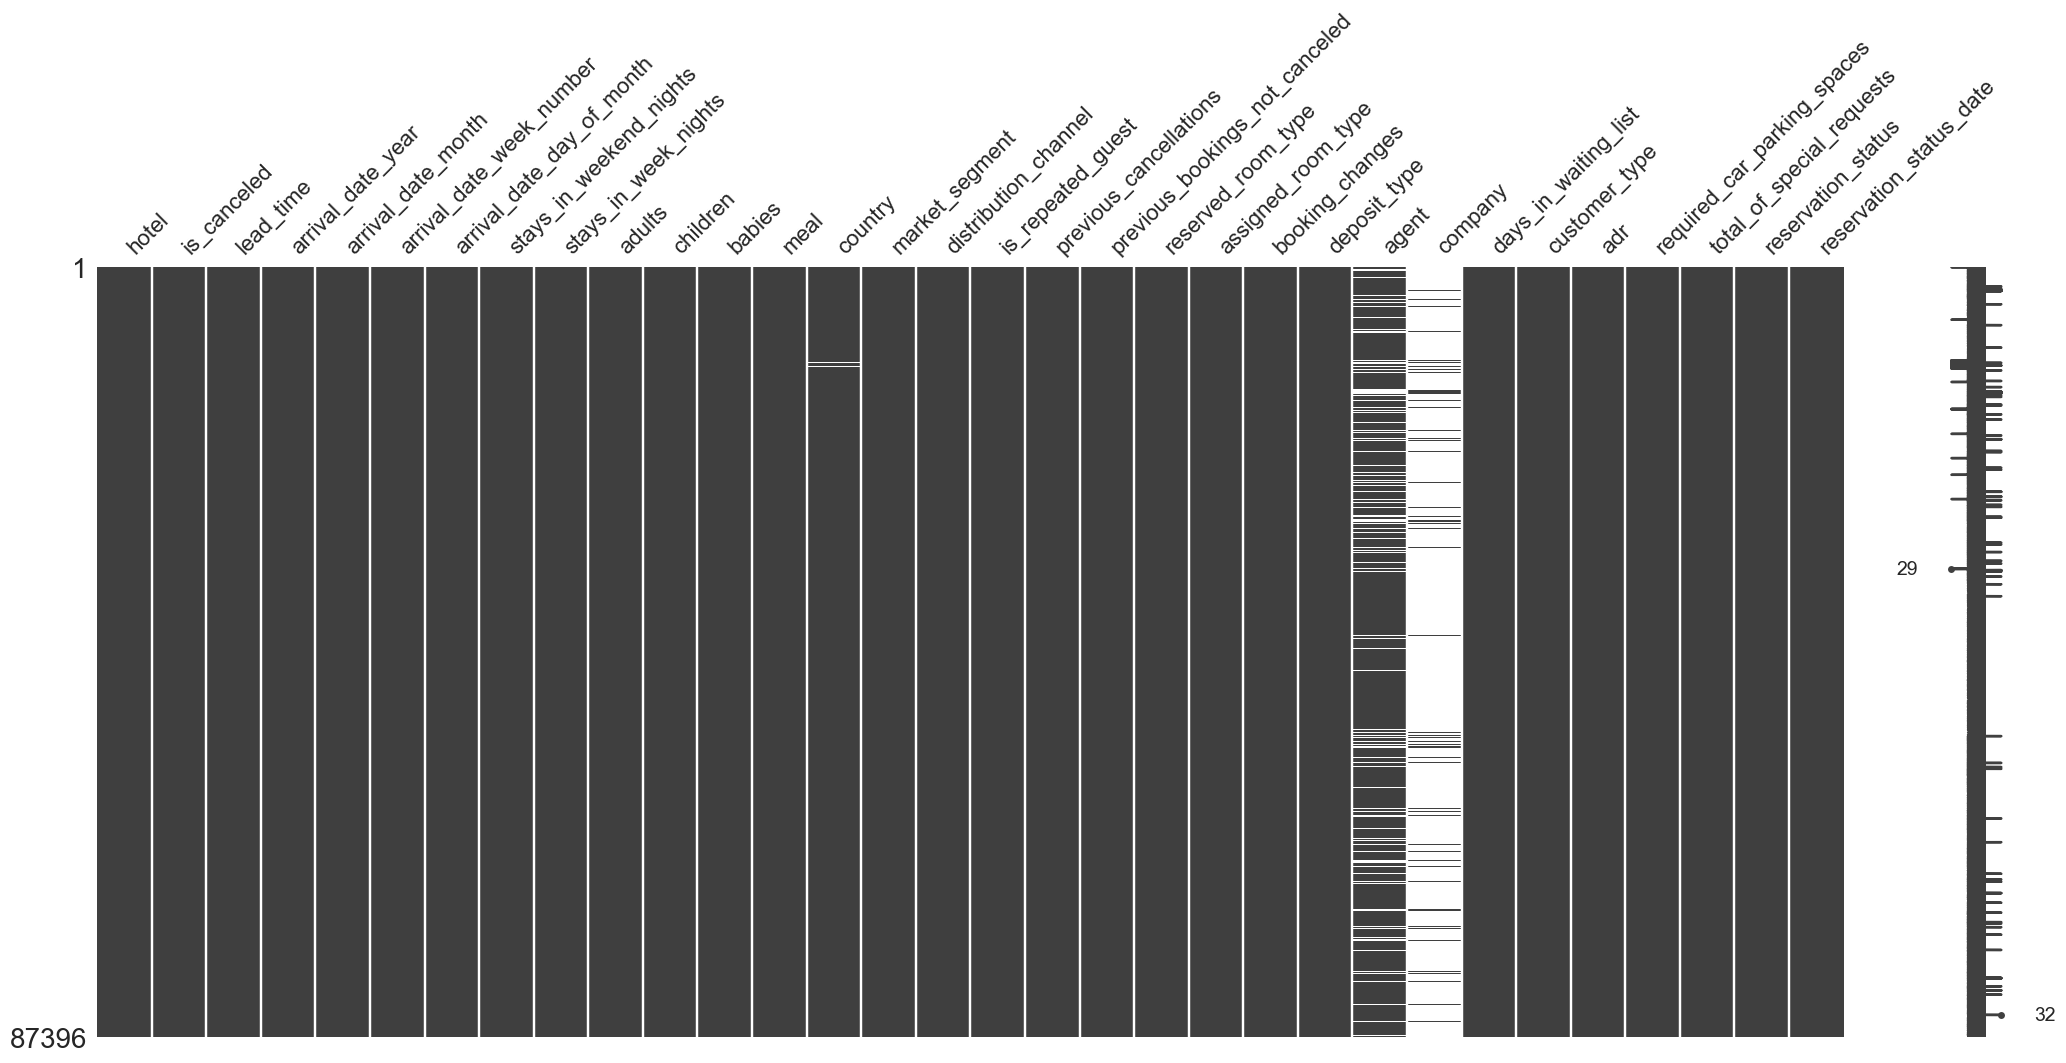

In [137]:
# Plotting bar chart of nullity in dataset
msno.matrix(df=df)

# Displaying chart
plt.show()

Notes:
* `hotel`, `is_canceled`, `lead_time`, and other columns with similar visualizations are completely populated with values.
* `country` only has a small amount of missing values (so does `children` actually, but it is not shown well in this visualization).
* `agent` have spotty chart/visualization, indicating randomness in missing values.
* `company` is dominated with blank chart, with no discernible pattern in missing value (a bit of data points are randomly filled with values).

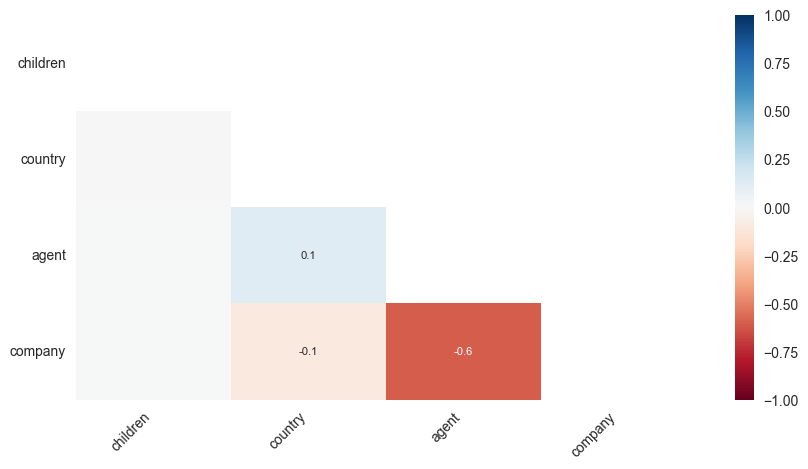

In [138]:
# Plotting heatmap of nullity in dataset
msno.heatmap(df=df, 
                  figsize=(10, 5), # Applying parameter for smaller figure size
                  fontsize=10) # Applying parameter for smaller font size

# Displaying chart
plt.show()

Notes:

* Nullity correlation ranges from -1 (if one variable appears, the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears, the other definitely also does).
* Correlations are computed using `pandas.corr()` default/standard method (Pearson's).
* Based on this correlation, data points which contain values in `company` are mostly incomplete (have missing value) in `agent`, and so otherwise.

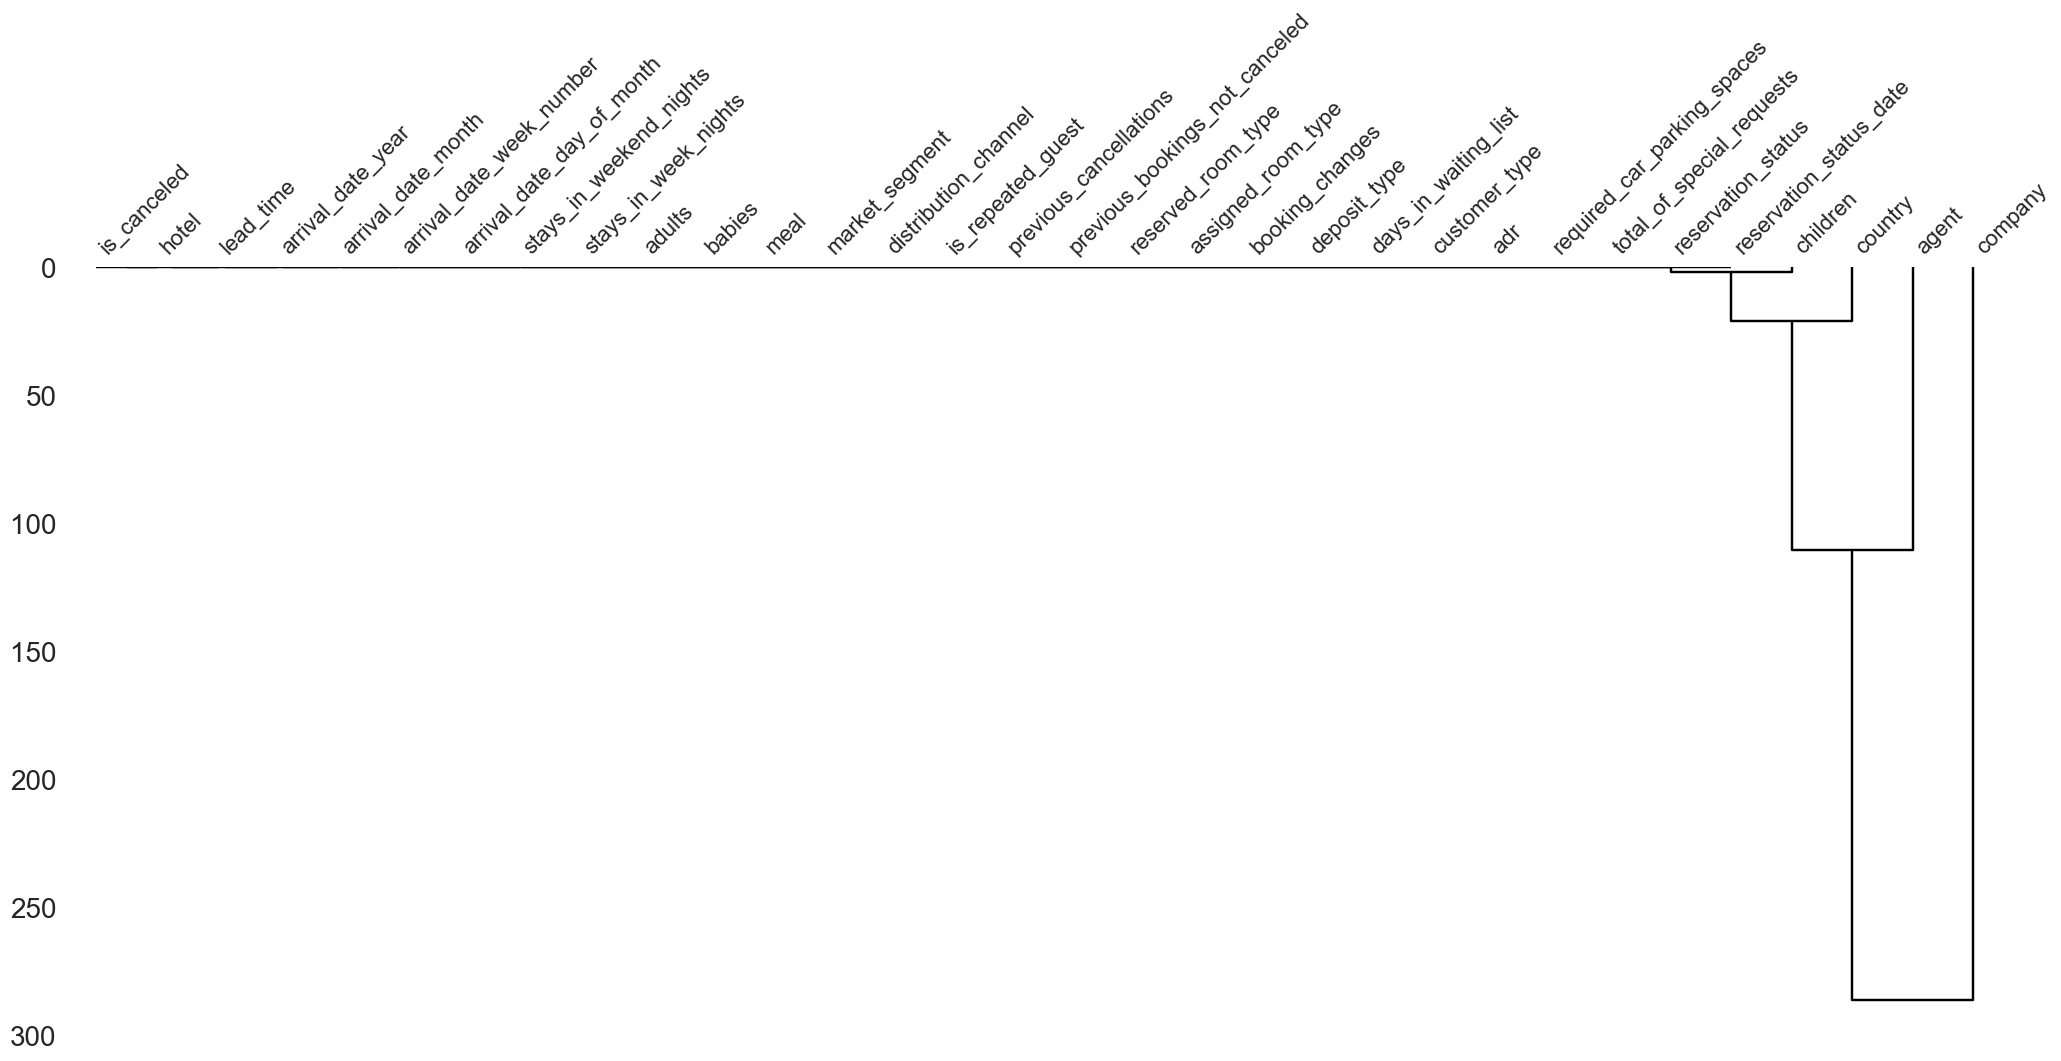

In [139]:
# Plotting dendrogram of nullity in dataset
msno.dendrogram(df=df)

# Displaying chart
plt.show()

Notes:
* Cluster leaves (variables) which linked together at a distance of zero (as shown in y-axis) fully predict one another's presence —one variable might always be empty when another is filled, or they might always both be filled or both empty.
* In this chart, the dendrogram glues together the variables that are present in every data point (i.e. from `is_canceled` to `total_of_special_requests`)
* Cluster leaves which split close to zero (`reservation_status` and `children`) predict one another very well, but still imperfectly.
* In contrast with this, `agent` and `company` are not linked directly, but through several steps of splitting in the dendrogram. This indicates that values (either observed or missing) in these columns are not exactly correlated with each other, but through combinations with values in `reservation_status`, `children`, and `country`.

### Tabular Analysis

In [140]:
# Filtering data with missing value in 'children'
with pd.option_context('display.max_columns', None): # Setting maximum number of column displayed to unlimited
    display(df[df.children.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


Notes:

* Data with missing value in `children` has similar value in `hotel`, `is_canceled`, `arrival_date_year`, etc. but also different value in `lead_time`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, etc. In other words, those missing data points are a random subset of the data.
* No available information (i.e. other variables in the dataset or information from data description) regarding the missing value in `children`, and
* No known mechanism or reason why the missing values in `children` are introduced in the dataset.

Therefore, based on previous graphical & tabular analyses, missing value in `children` **may be regarded as Missing Completely At Random (MCAR)**. If values for observations are missing completely at random, then **disregarding those cases would not bias the inferences made through the machine learning algorithm or model; especially when the number/percentage of missing value is relatively small**.

In [141]:
# Filtering data with missing value in 'country'
with pd.option_context('display.max_columns', None):
    display(df[df.country.isna()])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,0.0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-11-17
61244,City Hotel,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-12-06
65907,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


Notes:

Similar with above explanation, data with missing value in `country` are even more differing with each other, which **may also be regarded as MCAR**.


In [142]:
df.dropna(subset=['children'], inplace=True)
df.dropna(subset=['country'], inplace=True)

In [143]:
# Filtering data without missing value in 'agent' and 'company'
df[(df.agent.notna()) & df.company.notna()][['agent', 'company']]

,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
...,...,...
112499,9.0,478.0
113046,290.0,148.0
113082,290.0,148.0
113627,14.0,229.0


Notes:

* Values in `agent` and `company` are not exactly the same or matched with each other.
    * This indicates that the travel agency and the company/entity that made the booking are not the same for each data point.
    * Hence, it would not be appropriate/suitable to impute missing value in `agent` based on available value in `company` per data point, and vice versa.
* Based on previous findings, `agent` and `company` also have:
    * Significant amount of missing values: `13.69%` and `94.31%`, respectively.
    * High cardinality: `333` and `352` unique values, and
    * Moderate to high correlation with other variables in dataset; especially correlated with target `is_canceled`.

Therefore, these variables will not be included as features in the prediction modeling, and **missing values in these columns will not be handled**.

In [144]:
df = df.drop(columns= ['agent', 'company'])

## Invalid Data

In [145]:
# Casting variables to their appropriate data type
df = df.astype(dtype={'children': 'Int64'})

# Replacing values with other appropriate values
df.replace(to_replace={'meal': {'Undefined': 'SC'},
                       'is_canceled': {0: 'Not Canceled',
                                       1: 'Canceled'},
                       'is_repeated_guest': {0: 'Not Repeated',
                                             1: 'Repeated'}}, inplace=True)

# Verifying process
display(df[['children']].dtypes)
display(df.meal.unique())

children    Int64
dtype: object

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

## Data Merging

In [146]:
# Merging 'stays_in_week_nights' and 'stays_in_weekend_nights'
df.insert(loc=df.columns.get_loc(key='stays_in_week_nights') + 1, 
          column='total_stays_in_nights', 
          value=df.stays_in_week_nights + df.stays_in_weekend_nights)

# Merging 'adults', 'children', and 'babies'
df.insert(loc=df.columns.get_loc(key='babies') + 1, 
          column='total_guests', 
          value=df.adults + df.children + df.babies)

# Combining 'total_stays_in_nights' and 'adr'
df.insert(loc=df.columns.get_loc(key='adr') + 1, 
          column='revenue', 
          value=df.total_stays_in_nights * df.adr)

with pd.option_context('display.max_column', None):
    display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stays_in_nights,adults,children,babies,total_guests,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,revenue,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not Canceled,342,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,Not Repeated,0,0,C,C,3,No Deposit,0,Transient,0.0,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Not Canceled,737,2015,July,27,1,0,0,0,2,0,0,2,BB,PRT,Direct,Direct,Not Repeated,0,0,C,C,4,No Deposit,0,Transient,0.0,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Not Canceled,7,2015,July,27,1,0,1,1,1,0,0,1,BB,GBR,Direct,Direct,Not Repeated,0,0,A,C,0,No Deposit,0,Transient,75.0,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Not Canceled,13,2015,July,27,1,0,1,1,1,0,0,1,BB,GBR,Corporate,Corporate,Not Repeated,0,0,A,A,0,No Deposit,0,Transient,75.0,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Not Canceled,14,2015,July,27,1,0,2,2,2,0,0,2,BB,GBR,Online TA,TA/TO,Not Repeated,0,0,A,A,0,No Deposit,0,Transient,98.0,196.0,0,1,Check-Out,2015-07-03


| Variable | Type |
| --- | --- |
| hotel | I |
| lead_time | I |
| arrival_date_year | E |
| arrival_date_month | E |
| arrival_date_week_number | E |
| arrival_date_day_of_month | E |
| total_stays_in_nights | E |
| total_guests | E |
| meal | I |
| country | E |
| market_segment | I |
| distribution_channel | I |
| is_repeated_guest | I |
| previous_cancellations | I |
| previous_bookings_not_canceled | I |
| reserved_room_type | E |
| assigned_room_type | I |
| booking_changes | E |
| deposit_type | I |
| agent | I |
| company | I |
| days_in_waiting_list | I |
| customer_type | I |
| revenue | I |
| required_car_parking_spaces | E |
| total_of_special_requests | E |
| reservation_status | I |
| reservation_status_date | I |

---

# **Data Analysis**

## Initial Data Analysis

### Categorical Variable

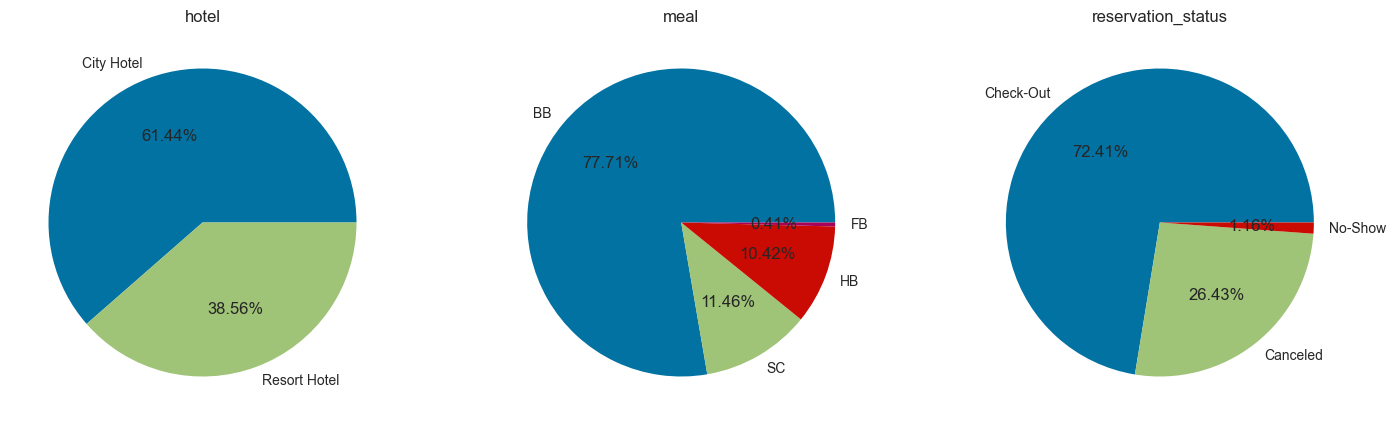

In [147]:
# Setting figure size in inches
plt.figure(figsize=(17.5, 5))

# Plotting pie charts
plt.subplot(1, 3, 1) # Adding pie chart into subplot figure
plt.title(label='hotel') # Setting chart title
plt.pie(x=df.hotel.value_counts(), # Showing counts of observations
        labels=df.hotel.value_counts().index, # Adding labels to chart
        autopct='%.2f%%') # Adding percentage values to chart

plt.subplot(1, 3, 2)
plt.title(label='meal')
plt.pie(x=df.meal.value_counts(), labels=df.meal.value_counts().index, autopct='%.2f%%')

plt.subplot(1, 3, 3)
plt.title(label='reservation_status')
plt.pie(x=df.reservation_status.value_counts(), labels=df.reservation_status.value_counts().index, autopct='%.2f%%')

plt.show() # Displaying chart

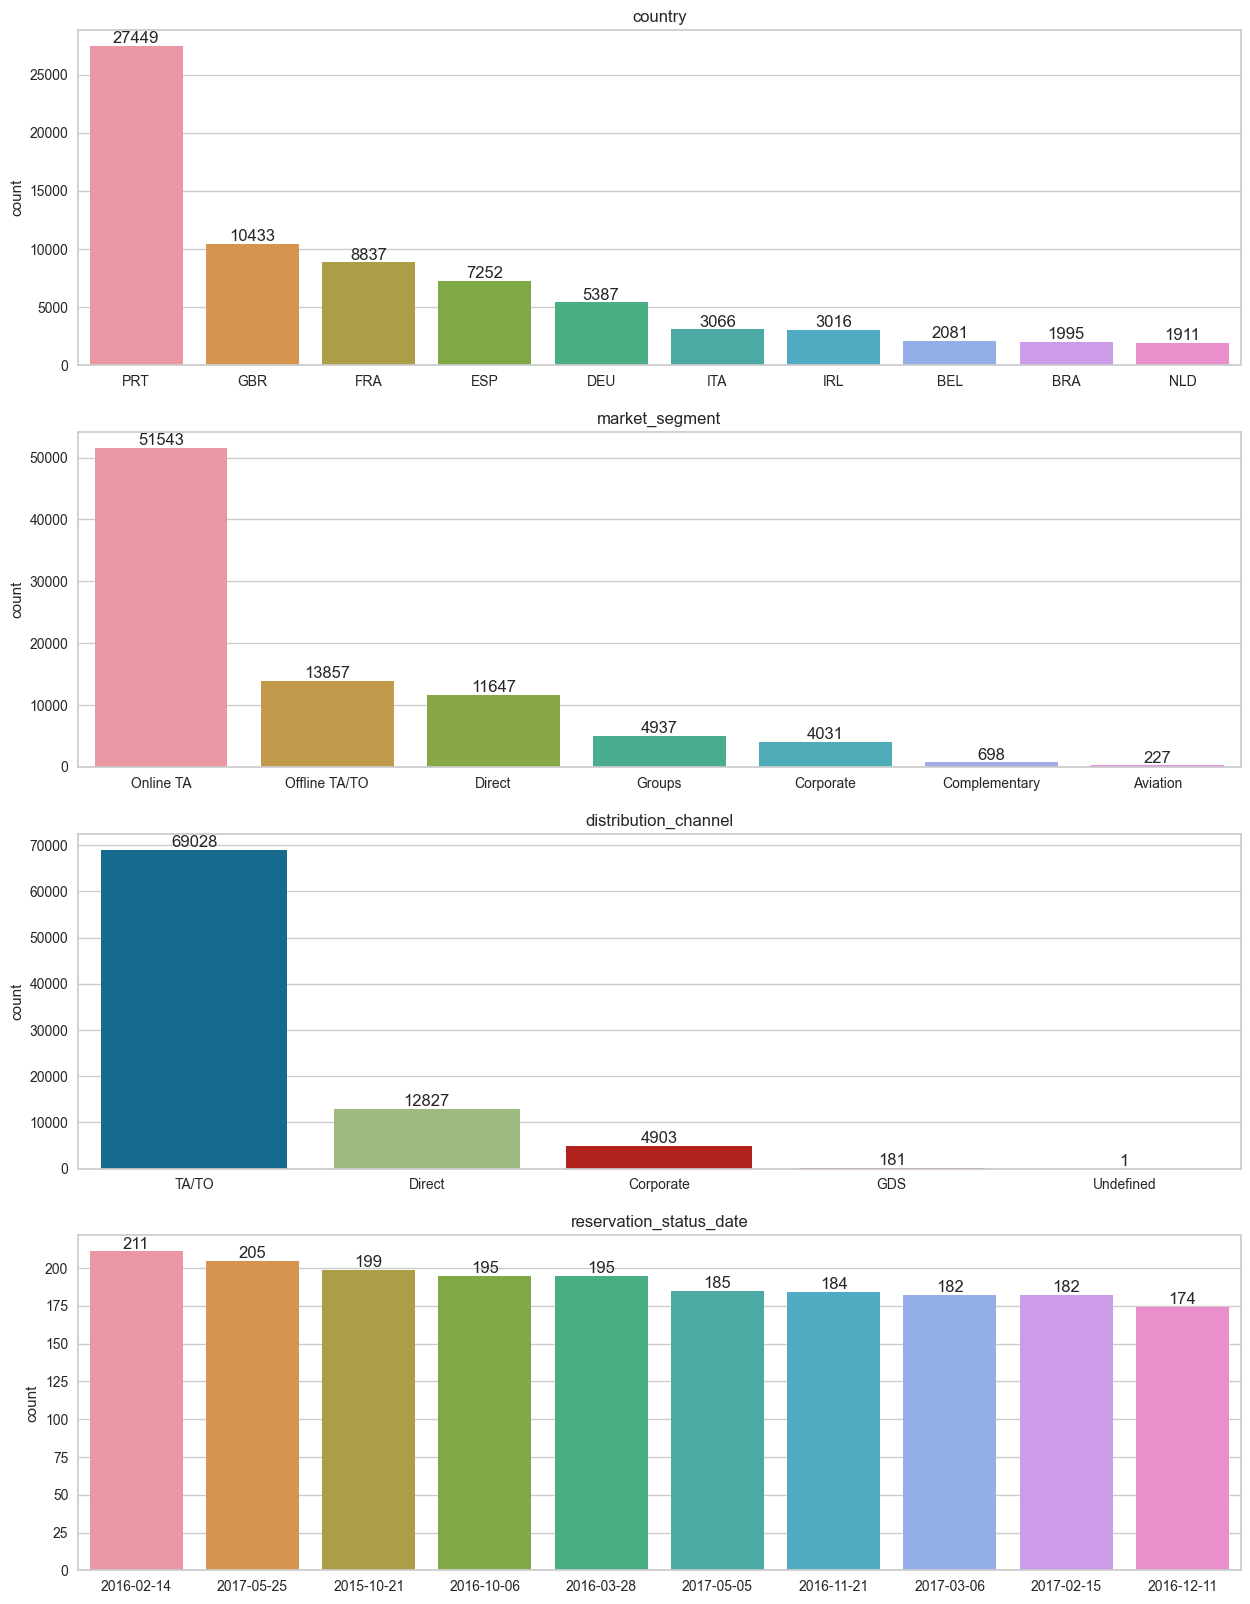

In [148]:
# Creating subplots
fig, axs = plt.subplots(nrows=4, ncols=1, # Setting number of rows & columns
                        figsize=(15, 20))

# Plotting bar charts
ax = sns.countplot(data=df, x='country', # Showing counts of observation
                   order=df.country.value_counts() # Ordering chart by values in descending order
                                   .iloc[:10].index, # Selecting top 10 values
                   ax=axs[0]) # Putting chart into subplot
ax.set(title='country', 
       xlabel=None) # Removing redundant x-axis label
ax.bar_label(container=ax.containers[0]) # Adding labels to chart

ax = sns.countplot(data=df, x='market_segment', order=df.market_segment.value_counts().index, ax=axs[1])
ax.set(title='market_segment', xlabel=None)
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='distribution_channel', order=df.distribution_channel.value_counts().index, ax=axs[2])
ax.set(title='distribution_channel', xlabel=None)
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='reservation_status_date', order=df.reservation_status_date.value_counts().iloc[:10].index, ax=axs[3])
ax.set(title='reservation_status_date', xlabel=None)
ax.bar_label(container=ax.containers[0])

plt.show()

Notes:

Because of high cardinality in `country` and `reservation_status_date`, and for ease of reading, visualizations of these variables are limited to show only top 10 values based on the counts of observations.

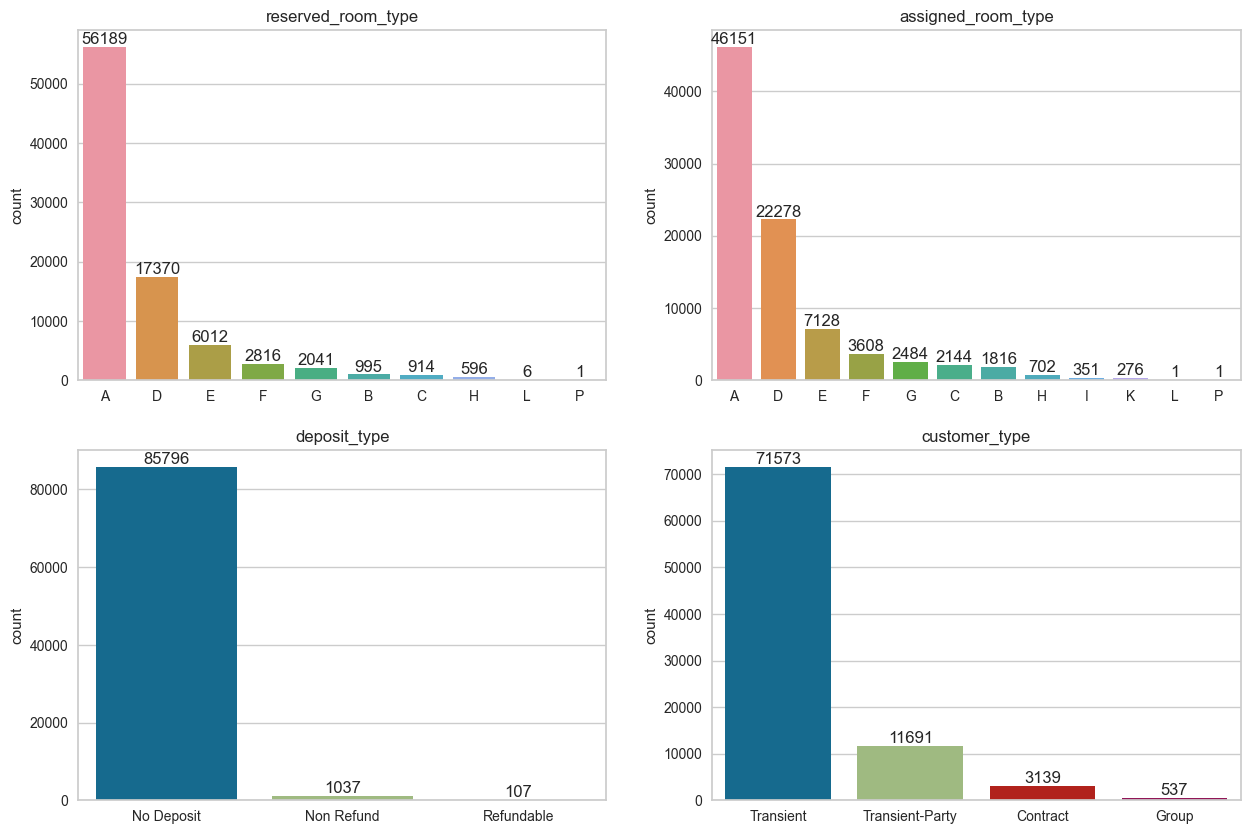

In [149]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax = sns.countplot(data=df, x='reserved_room_type', order=df.reserved_room_type.value_counts().index, ax=axs[0, 0])
ax.set(title='reserved_room_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='assigned_room_type', order=df.assigned_room_type.value_counts().index, ax=axs[0, 1])
ax.set(title='assigned_room_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='deposit_type', order=df.deposit_type.value_counts().index, ax=axs[1, 0])
ax.set(title='deposit_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

ax = sns.countplot(data=df, x='customer_type', order=df.customer_type.value_counts().index, ax=axs[1, 1])
ax.set(title='customer_type', xlabel=None) 
ax.bar_label(container=ax.containers[0])

plt.show()

### Numerical Variable

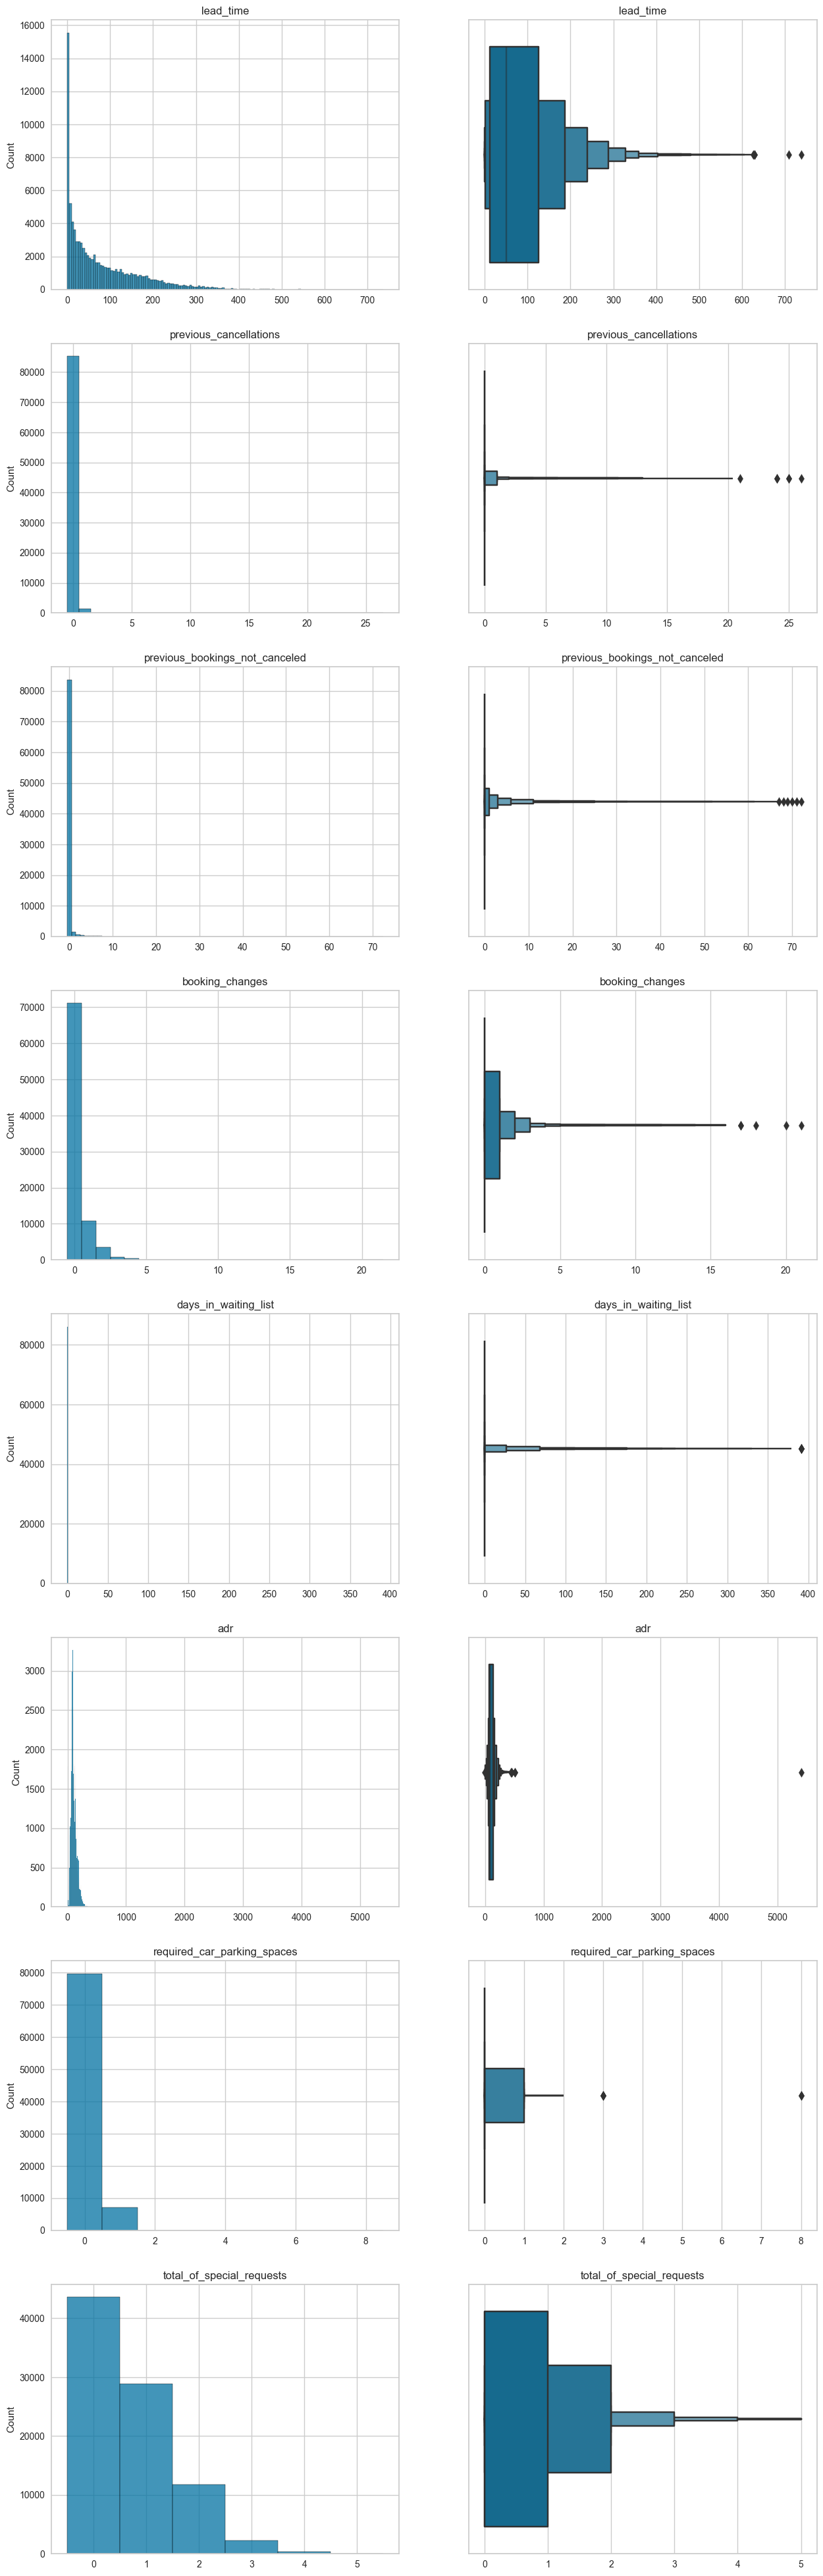

In [150]:
# Plotting numerical variables
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(15, 50))

sns.histplot(data=df, x='lead_time', ax=axs[0, 0]).set(xlabel=None, title='lead_time')
sns.boxenplot(data=df, x='lead_time', ax=axs[0, 1]).set(xlabel=None, title='lead_time')

sns.histplot(data=df, x='previous_cancellations', discrete=True, ax=axs[1, 0]).set(xlabel=None, title='previous_cancellations')
sns.boxenplot(data=df, x='previous_cancellations', ax=axs[1, 1]).set(xlabel=None, title='previous_cancellations')

sns.histplot(data=df, x='previous_bookings_not_canceled', discrete=True, ax=axs[2, 0]).set(xlabel=None, title='previous_bookings_not_canceled')
sns.boxenplot(data=df, x='previous_bookings_not_canceled', ax=axs[2, 1]).set(xlabel=None, title='previous_bookings_not_canceled')

sns.histplot(data=df, x='booking_changes', discrete=True, ax=axs[3, 0]).set(xlabel=None, title='booking_changes')
sns.boxenplot(data=df, x='booking_changes', ax=axs[3, 1]).set(xlabel=None, title='booking_changes')

sns.histplot(data=df, x='days_in_waiting_list', discrete=True, ax=axs[4, 0]).set(xlabel=None, title='days_in_waiting_list')
sns.boxenplot(data=df, x='days_in_waiting_list', ax=axs[4, 1]).set(xlabel=None, title='days_in_waiting_list')

sns.histplot(data=df, x='adr', ax=axs[5, 0]).set(xlabel=None, title='adr')
sns.boxenplot(data=df, x='adr', ax=axs[5, 1]).set(xlabel=None, title='adr')

sns.histplot(data=df, x='required_car_parking_spaces', discrete=True, ax=axs[6, 0]).set(xlabel=None, title='required_car_parking_spaces')
sns.boxenplot(data=df, x='required_car_parking_spaces', ax=axs[6, 1]).set(xlabel=None, title='required_car_parking_spaces')

sns.histplot(data=df, x='total_of_special_requests', discrete=True, ax=axs[7, 0]).set(xlabel=None, title='total_of_special_requests')
sns.boxenplot(data=df, x='total_of_special_requests', ax=axs[7, 1]).set(xlabel=None, title='total_of_special_requests')

plt.show()

In [151]:
# # Listing numerical variables
# numeric_vars = df.select_dtypes(include='number')

# # Showing statistic values of numerical variables
# pd.DataFrame(data={'numeric_variables': numeric_vars.columns,
#                    'skewness': numeric_vars.apply(func=lambda var: var.skew()).values,
#                    'kurtosis': numeric_vars.apply(func=lambda var: var.kurt()).values,
#                    'kstest_statistics': numeric_vars.apply(lambda var: kstest(rvs=var, cdf='norm') # Comparing numerical vars against normal distribution
#                                                                               [0]).values,
#                    'kstest_pvalues': numeric_vars.apply(lambda var: kstest(rvs=var, cdf='norm')[1]).values,
#                    'normaltest_statistics': numeric_vars.apply(lambda var: normaltest(a=var, nan_policy='omit')[0]).values,
#                    'normaltest_pvalues': numeric_vars.apply(lambda var: normaltest(a=var, nan_policy='omit')[1]).values})

Notes:
* Skewness with positive value indicates variable with positive distribution or right-skewed, and otherwise for negative value.
* Kurtosis value above 3 —using Fisher's definition of kurtosis— indicates variable with more extreme outliers than normal distribution (leptokurtic), and otherwise for below 3 (mesokurtic).
* P-value of normality test used (Kolmogorov-Smirnov and D'Agostino-Pearson, respectively) below critical statistical significance (0.05) indicates that we may reject the null hypotheses and assumes that the variable is not normally distributed.

Based on graphical & statistical summaries above, it may be concluded that **all numerical variables in dataset are not normally distributed (non-parametric)**.

## Exploratory Data Analysis

#### **Percentage of Hotel Type**

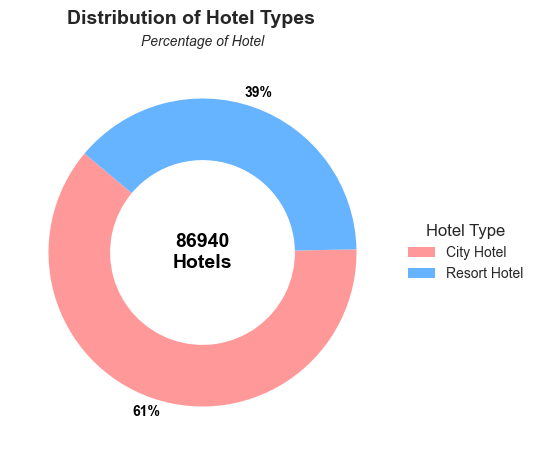

In [152]:
hotel_counts = df['hotel'].value_counts()

# Warna untuk setiap jenis hotel
colors = ['#ff9999','#66b3ff']

# Buat donut chart dengan inner radius lebih kecil
fig, ax = plt.subplots(figsize=(9, 5))
wedges, texts, autotexts = ax.pie(
    hotel_counts,
    labels=None,  # Tidak menampilkan label hotel
    autopct='%1.0f%%',
    pctdistance=1.1,  # Menempatkan persentase di luar
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Lebih kecil inner radius
)

# Tambahkan jumlah total hotel di tengah-tengah donut chart
total_hotels = hotel_counts.sum()
ax.text(0, 0, f'{total_hotels}\nHotels', horizontalalignment='center', verticalalignment='center', fontsize=14, weight='bold', color='black')

plt.setp(autotexts, size=10, weight='bold', color='black')

# Tambahkan legenda
ax.legend(wedges, hotel_counts.index, title="Hotel Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tambahkan subtitle
plt.suptitle('Distribution of Hotel Types', fontsize=14, weight='bold')
plt.title('Percentage of Hotel', fontsize=10, style='italic', pad=10)

plt.show()

#### **Cancellation Percentage**

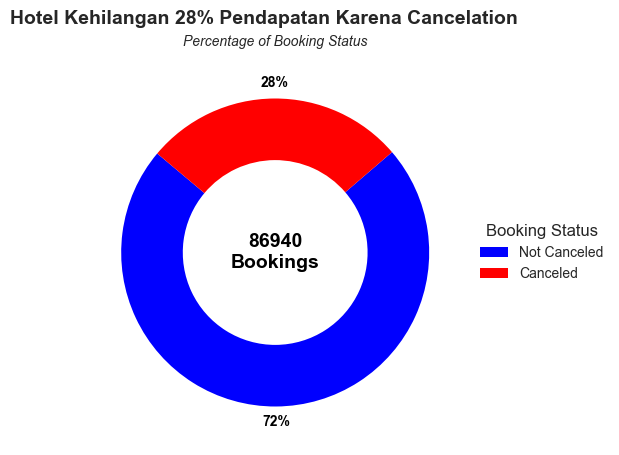

In [153]:
booking_counts = df['is_canceled'].value_counts()

# Warna untuk setiap jenis hotel
colors = ['blue','red']

# Buat donut chart dengan inner radius lebih kecil
fig, ax = plt.subplots(figsize=(9, 5))
wedges, texts, autotexts = ax.pie(
    booking_counts,
    labels=None,
    autopct='%1.0f%%',
    pctdistance=1.1,
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Lebih kecil inner radius
)

# Tambahkan jumlah total hotel di tengah-tengah donut chart
total_booking = booking_counts.sum()
ax.text(0, 0, f'{total_booking}\nBookings', horizontalalignment='center', verticalalignment='center', fontsize=14, weight='bold', color='black')

plt.setp(autotexts, size=10, weight='bold', color='black')

# Tambahkan legenda
ax.legend(wedges, booking_counts.index, title="Booking Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tambahkan subtitle
plt.suptitle('Hotel Kehilangan 28% Pendapatan Karena Cancelation', fontsize=14, weight='bold')
plt.title('Percentage of Booking Status', fontsize=10, style='italic', pad=10)

plt.show()

#### **Booking Status of Each Hotel**

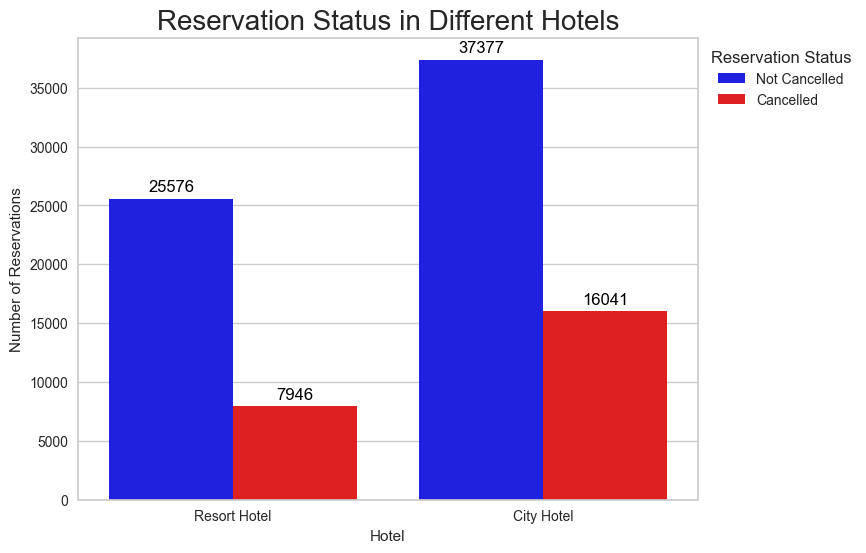

In [154]:
plt.figure(figsize=(8, 6))

# Tentukan palet warna
palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

# Buat countplot dengan warna yang ditentukan
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=palette)

# Atur legend dan posisi
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

# Tambahkan label di atas setiap bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),  # Offset label dari bar
                 textcoords='offset points')

# Atur judul dan label sumbu
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

plt.show()

#### **Booking Status of Each Hotel**

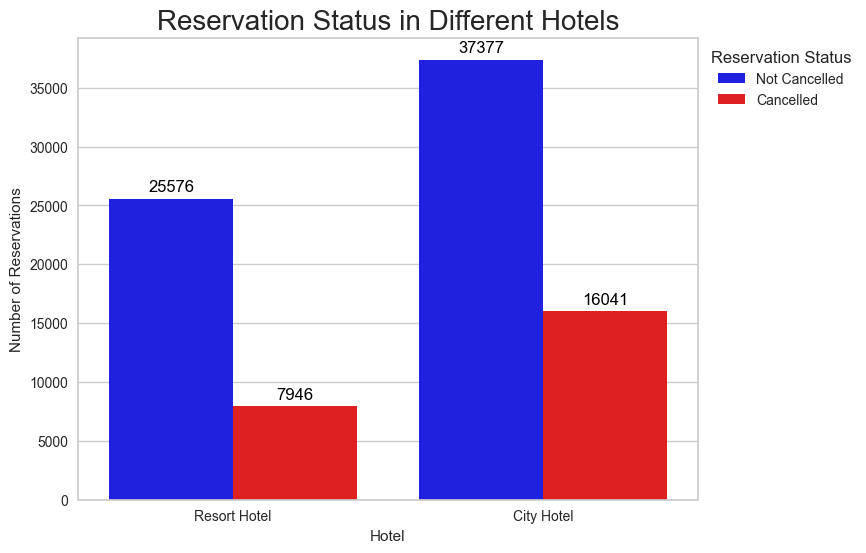

In [155]:
plt.figure(figsize=(8, 6))

# Tentukan palet warna
palette = {'Not Canceled': 'blue', 'Canceled': 'red'}

# Buat countplot dengan warna yang ditentukan
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=palette)

# Atur legend dan posisi
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1), title='Reservation Status', labels=['Not Cancelled', 'Cancelled'])

# Tambahkan label di atas setiap bar
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=12, color='black', 
                 xytext=(0, 5),  # Offset label dari bar
                 textcoords='offset points')

# Atur judul dan label sumbu
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

plt.show()

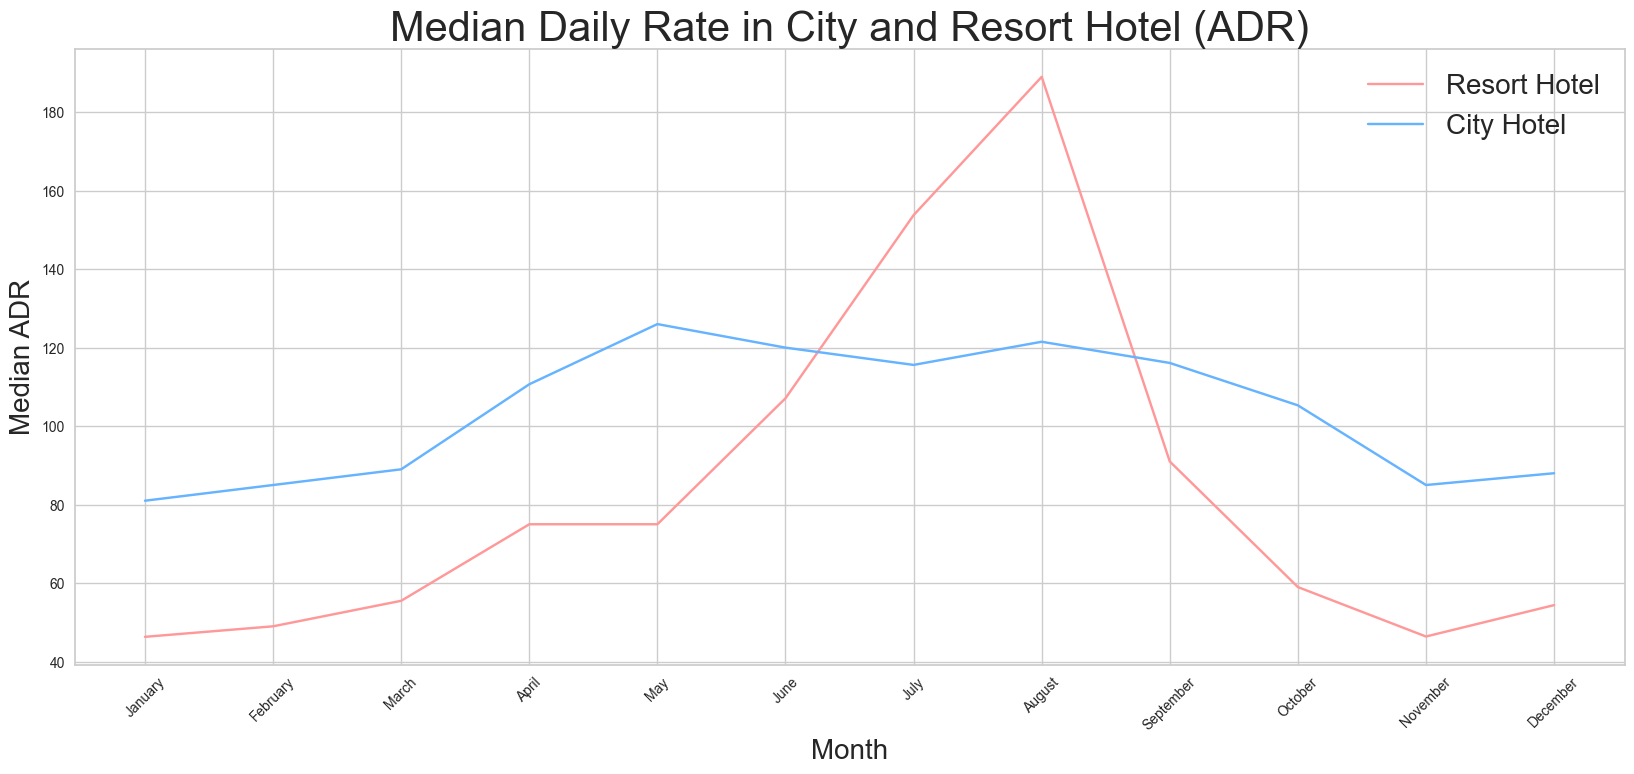

In [156]:
# Filter the data
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

# Calculate cancellation rates
resort_cancellation_rate = resort_hotel['is_canceled'].value_counts(normalize=True)
city_cancellation_rate = city_hotel['is_canceled'].value_counts(normalize=True)

# Group by arrival month and calculate median ADR
resort_hotel_grouped = resort_hotel.groupby('arrival_date_month')[['adr']].median()
city_hotel_grouped = city_hotel.groupby('arrival_date_month')[['adr']].median()

# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the index to a categorical type with a specific order
resort_hotel_grouped.index = pd.Categorical(resort_hotel_grouped.index, categories=month_order, ordered=True)
city_hotel_grouped.index = pd.Categorical(city_hotel_grouped.index, categories=month_order, ordered=True)

# Sort by the month order
resort_hotel_grouped = resort_hotel_grouped.sort_index()
city_hotel_grouped = city_hotel_grouped.sort_index()

# Define colors
colors = ['#ff9999', '#66b3ff']  # Colors for Resort Hotel and City Hotel

# Plotting
plt.figure(figsize=(20, 8))
plt.title('Median Daily Rate in City and Resort Hotel (ADR)', fontsize=30)
plt.plot(resort_hotel_grouped.index, resort_hotel_grouped['adr'], label='Resort Hotel', color=colors[0])
plt.plot(city_hotel_grouped.index, city_hotel_grouped['adr'], label='City Hotel', color=colors[1])
plt.legend(fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Median ADR', fontsize=20)
plt.xticks(rotation=45)
plt.show()

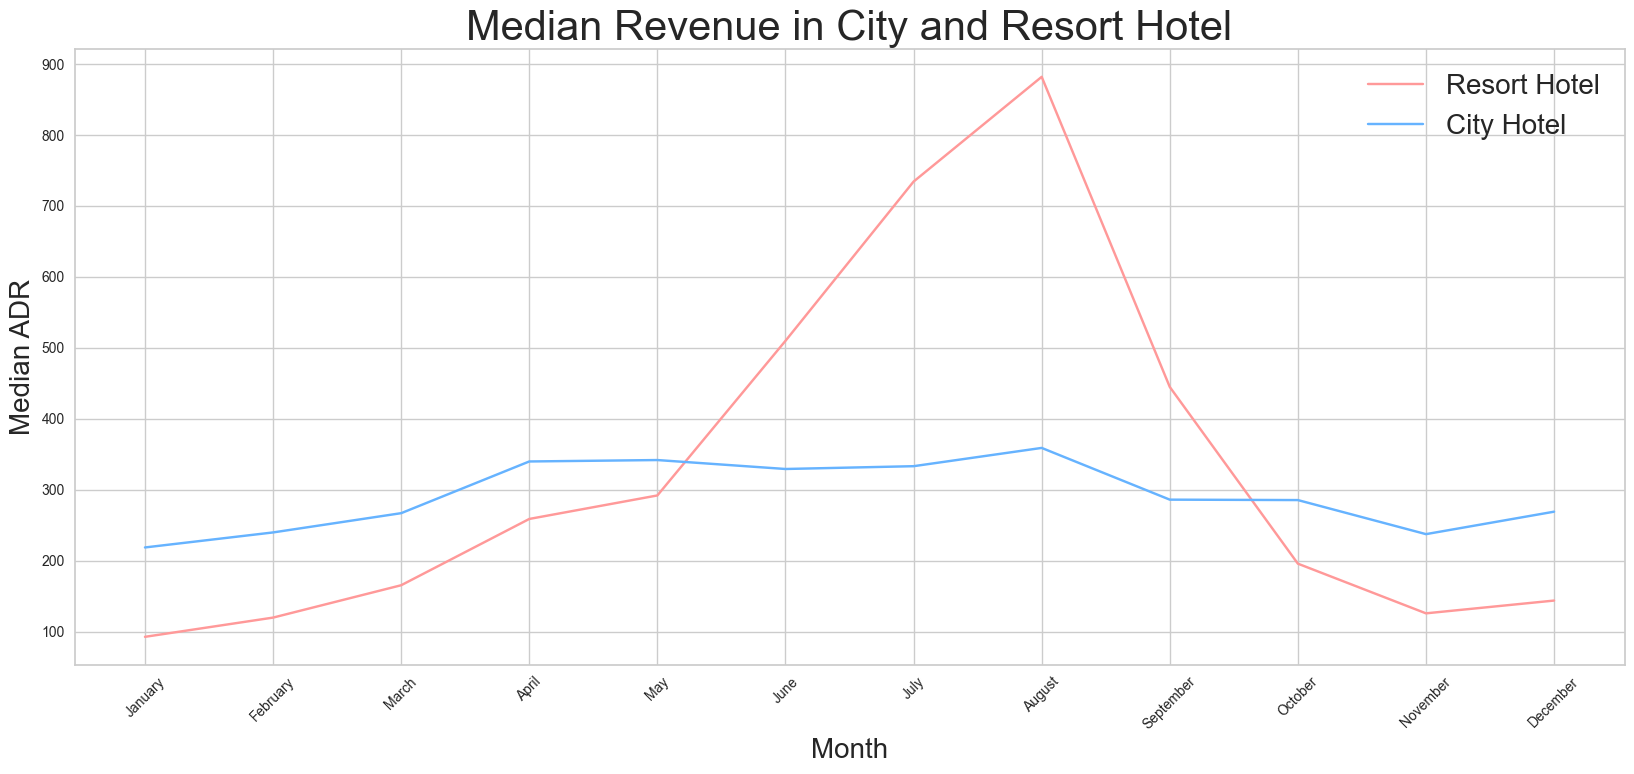

In [157]:
# Filter the data
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

# Calculate cancellation rates
resort_cancellation_rate = resort_hotel['is_canceled'].value_counts(normalize=True)
city_cancellation_rate = city_hotel['is_canceled'].value_counts(normalize=True)

# Group by arrival month and calculate median ADR
resort_hotel_grouped = resort_hotel.groupby('arrival_date_month')[['revenue']].median()
city_hotel_grouped = city_hotel.groupby('arrival_date_month')[['revenue']].median()

# Define the month order
year_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the index to a categorical type with a specific order
resort_hotel_grouped.index = pd.Categorical(resort_hotel_grouped.index, categories=year_order, ordered=True)
city_hotel_grouped.index = pd.Categorical(city_hotel_grouped.index, categories=year_order, ordered=True)

# Sort by the month order
resort_hotel_grouped = resort_hotel_grouped.sort_index()
city_hotel_grouped = city_hotel_grouped.sort_index()

# Define colors
colors = ['#ff9999', '#66b3ff']  # Colors for Resort Hotel and City Hotel

# Plotting
plt.figure(figsize=(20, 8))
plt.title('Median Revenue in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel_grouped.index, resort_hotel_grouped['revenue'], label='Resort Hotel', color=colors[0])
plt.plot(city_hotel_grouped.index, city_hotel_grouped['revenue'], label='City Hotel', color=colors[1])
plt.legend(fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Median ADR', fontsize=20)
plt.xticks(rotation=45)
plt.show()

#### **Top Countries With Canceled Bookings**

In [158]:
cancelled_data = df[df['is_canceled']=='Canceled']
top_10_country = cancelled_data['country'].value_counts()[:10]
top_10_country

PRT    9787
GBR    1985
ESP    1862
FRA    1733
ITA    1075
DEU    1053
BRA     727
IRL     668
USA     459
BEL     411
Name: country, dtype: int64

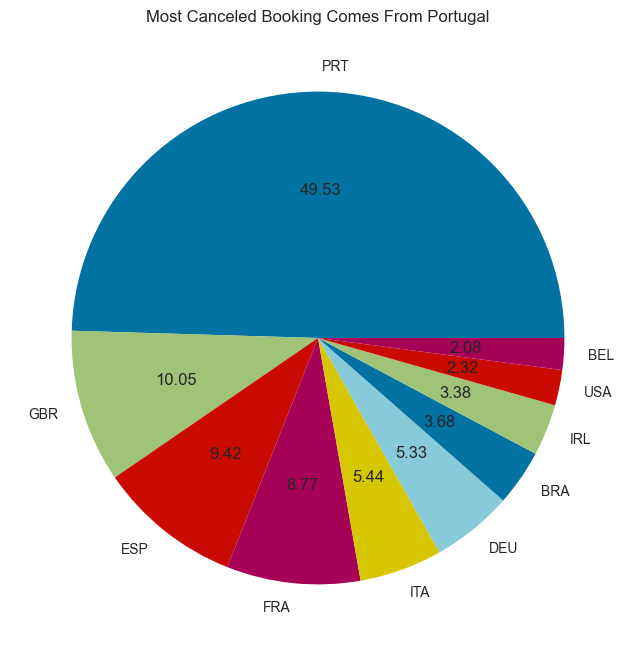

In [159]:
plt.figure(figsize = (8,8))
plt.title('Most Canceled Booking Comes From Portugal')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

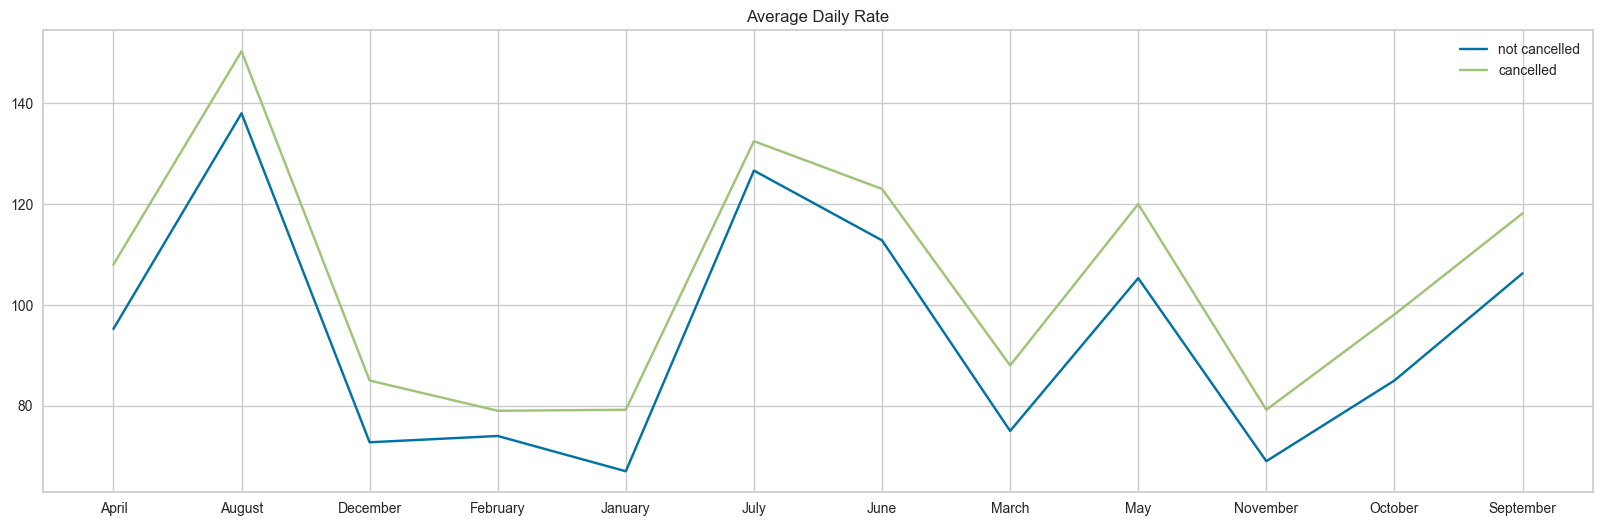

In [160]:
cancelled_df_adr = cancelled_data.groupby('arrival_date_month')[['adr']].median()
cancelled_df_adr.reset_index(inplace=True) 
cancelled_df_adr.sort_values('arrival_date_month', inplace=True)

not_cancelled_data = df[df['is_canceled']=='Not Canceled']
not_cancelled_df_adr = not_cancelled_data.groupby('arrival_date_month')[['adr']].median()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize =(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['arrival_date_month'], not_cancelled_df_adr['adr'], label= 'not cancelled') 
plt.plot(cancelled_df_adr['arrival_date_month'], cancelled_df_adr['adr'], label= 'cancelled')
plt.legend()

Mid Year has highest ADR (May, August, June, July)

#### **Market Segment**

<AxesSubplot: xlabel='market_segment'>

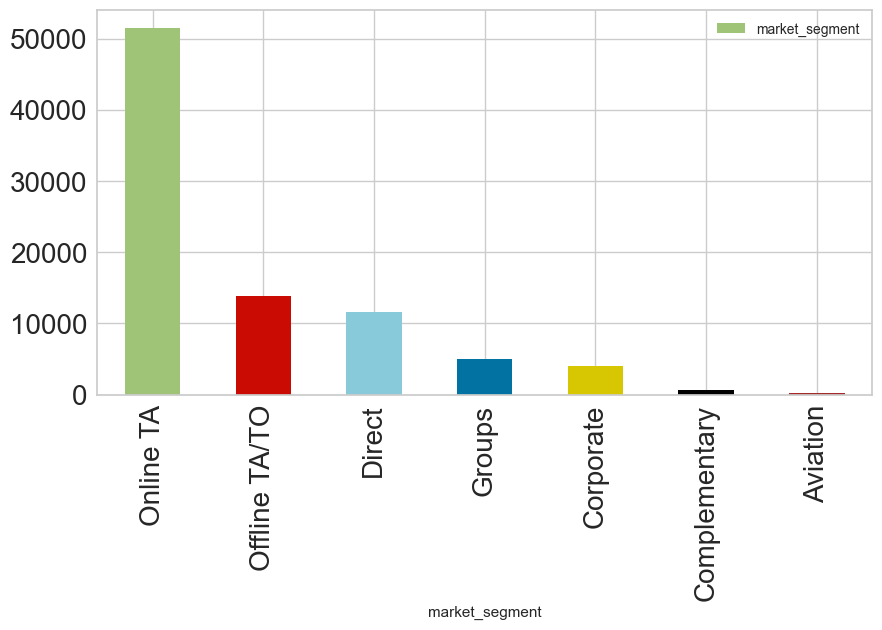

In [161]:
market_segment_df = pd.DataFrame(df['market_segment'])
market_segment_df_data = market_segment_df.groupby('market_segment')['market_segment'].count()
market_segment_df_data.sort_values(ascending = False, inplace = True)
plt.figure(figsize=(10,5))
y = np.array([4,5,6])
market_segment_df_data.plot(kind = 'bar', color=['g', 'r', 'c', 'b', 'y', 'black', 'brown'], fontsize = 20,legend='True')

#### **Favourite Room Type**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


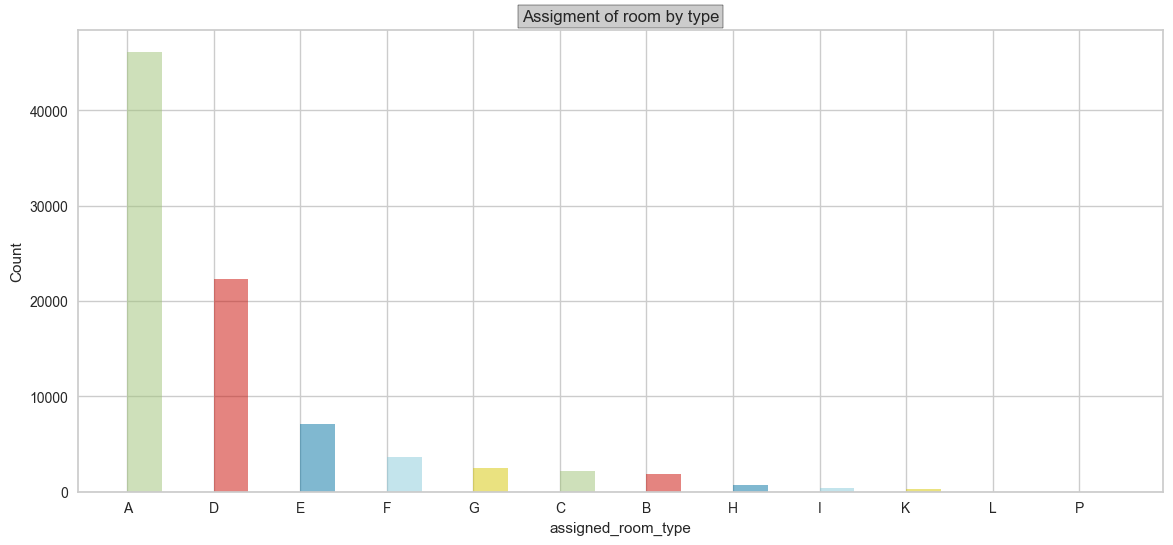

In [162]:
# Chart - 5 visualization code
def get_count_from_column_bar(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd


def plot_bar_chart_from_column(df, column_label, t1):
  df_grpd = get_count_from_column_bar(df, column_label)
  fig, ax = plt.subplots(figsize=(14, 6))
  c= ['g','r','b','c','y']
  ax.bar(df_grpd['index'], df_grpd['count'], width = 0.4, align = 'edge', linewidth = 4, color = c, linestyle = ':', alpha = 0.5)
  plt.title(t1, bbox={'facecolor':'0.8', 'pad':3})
  plt.legend()
  plt.ylabel('Count')
  plt.xlabel(column_label)
  plt.show()

plot_bar_chart_from_column(df, 'assigned_room_type', 'Assigment of room by type')
     

In [163]:
df.groupby(by='is_canceled').agg(func={'lead_time': 'median',
                                       'previous_cancellations': 'median',
                                       'booking_changes': 'median',
                                       'days_in_waiting_list': 'median',
                                       'adr': 'median',
                                       'required_car_parking_spaces': 'median',
                                       'total_of_special_requests': 'median',
                                       }).T

is_canceled,Canceled,Not Canceled
lead_time,80.0,38.0
previous_cancellations,0.0,0.0
booking_changes,0.0,0.0
days_in_waiting_list,0.0,0.0
adr,109.8,95.0
required_car_parking_spaces,0.0,0.0
total_of_special_requests,0.0,1.0


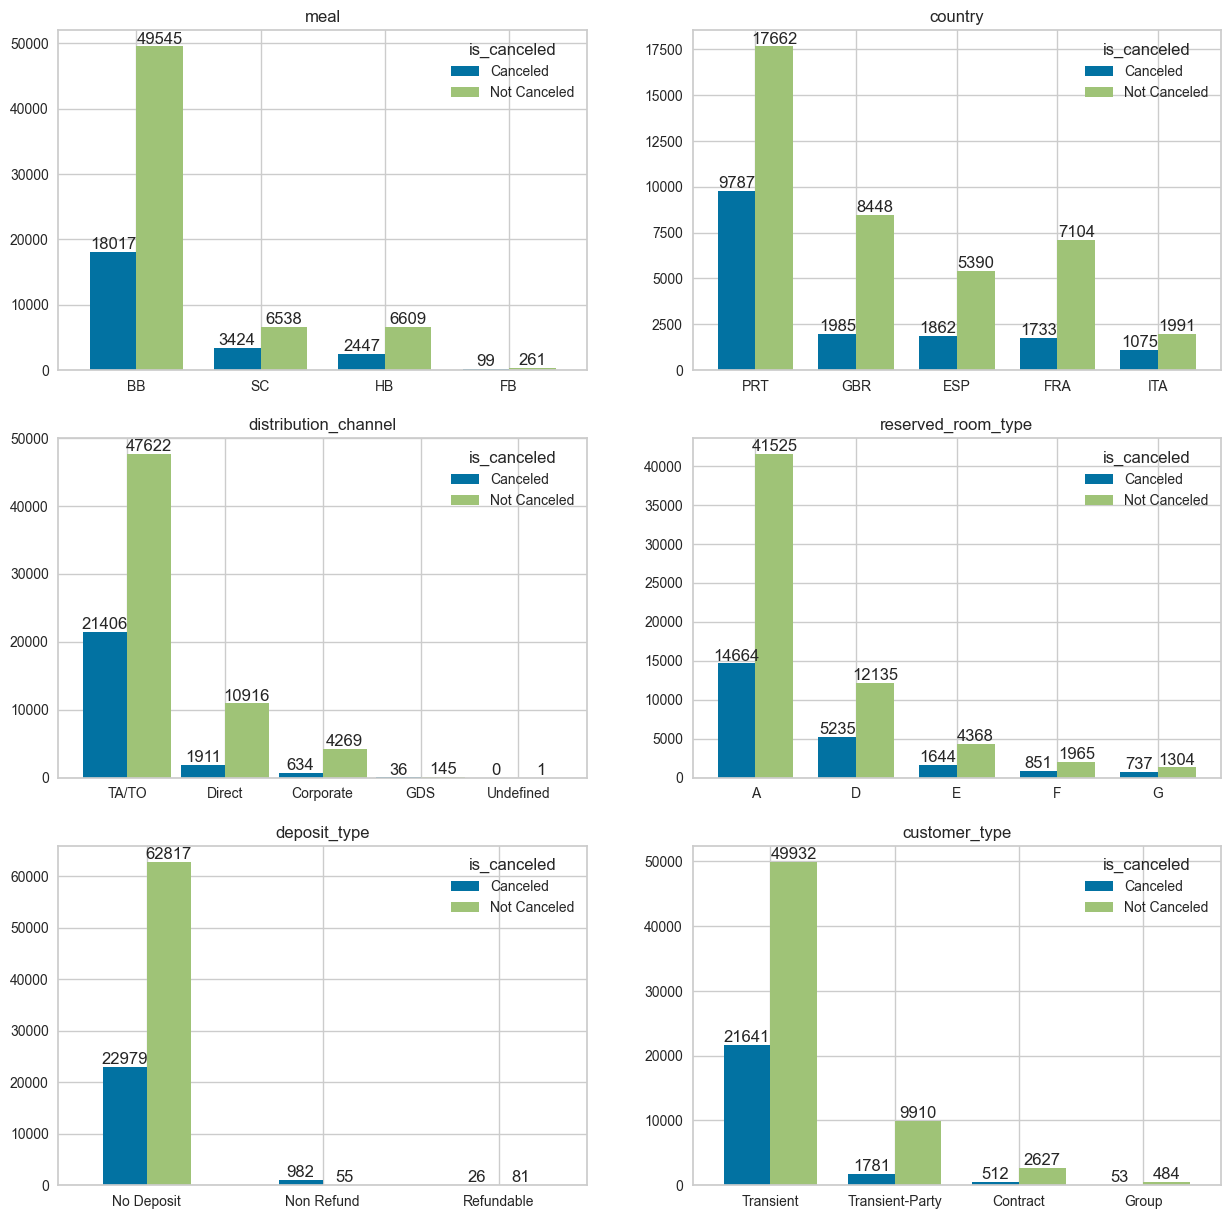

In [164]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

ax = pd.crosstab(index=df.is_canceled, columns=df.meal).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[0, 0], rot=0, width=0.75)
ax.set(xlabel=None, title='meal')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.country).T.sort_values(by='Canceled', ascending=False).iloc[:5].plot(kind='bar', ax=axs[0, 1], rot=0, width=0.75)
ax.set(xlabel=None, title='country')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.distribution_channel).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[1, 0], rot=0, width=0.9)
ax.set(xlabel=None, title='distribution_channel')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.reserved_room_type).T.sort_values(by='Canceled', ascending=False).iloc[:5].plot(kind='bar', ax=axs[1, 1], rot=0, width=0.75)
ax.set(xlabel=None, title='reserved_room_type')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.deposit_type).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[2, 0], rot=0)
ax.set(xlabel=None, title='deposit_type')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

ax = pd.crosstab(index=df.is_canceled, columns=df.customer_type).T.sort_values(by='Canceled', ascending=False).plot(kind='bar', ax=axs[2, 1], rot=0, width=0.75)
ax.set(xlabel=None, title='customer_type')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

plt.show()

In [165]:
df.replace(to_replace=['Not Canceled', 'Canceled'], value=[0, 1], inplace=True)
df.replace(to_replace=['Not Repeated', 'Repeated'], value=[0, 1], inplace=True)

In [166]:
df.to_csv(path_or_buf='hotel_bookings_cleaned.csv', index=False)